# Exploratory Data Analysis
## Part A: Model training (preparation)

**Objective**: Predict whether a customer will subscribe to a term deposit

**Target Variable**: `y` (binary: 'yes' or 'no' - customer subscribed to term deposit)

We need to start with some basic EDA to understand the dataset and to perform wrangling required to prepare the dataset for training. 

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data load and initial check

In [43]:
# Load dataset
df = pd.read_csv('data/dataset.csv', delimiter=';')

print("Dataset shape:", df.shape)
print("First few rows:")
df.head(10)

Dataset shape: (45211, 17)
First few rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [44]:
# Basic information
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
# Check data types
print("Data types:")
print(df.dtypes)

print("Column names:")
print(df.columns.tolist())

Data types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Column names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


## 2. Target variable check: `y` (Term deposit subscription)

In [46]:
# Target variable distribution
print("Target Variable (y - Term Deposit Subscription) Distribution:")
print(df['y'].value_counts())
print("\nPercentage Distribution:")
print(df['y'].value_counts(normalize=True) * 100)

Target Variable (y - Term Deposit Subscription) Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64

Percentage Distribution:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


As expected, the **dataset is imbalanced**, with prevalent negative class. **It can be beneficial to use rebalancing techniques**. 

## 3. Unknown values analysis

Note that we don't have any missing values (all the values are non-null, but there are plenty of `unknown` values in the dataset. 

In [47]:
# Check for 'unknown' values in categorical columns
print("'Unknown' Values in Categorical Columns:\n")
categorical_cols = df.select_dtypes(include=['object']).columns

unknown_summary = []
for col in categorical_cols:
    if 'unknown' in df[col].unique():
        unknown_count = (df[col] == 'unknown').sum()
        unknown_pct = (unknown_count / len(df)) * 100
        unknown_summary.append({
            'Column': col,
            'Unknown_Count': unknown_count,
            'Percentage': f"{unknown_pct:.2f}%"
        })

unknown_df = pd.DataFrame(unknown_summary).sort_values('Unknown_Count', ascending=False)
print(unknown_df.to_string(index=False))

'Unknown' Values in Categorical Columns:

   Column  Unknown_Count Percentage
 poutcome          36959     81.75%
  contact          13020     28.80%
education           1857      4.11%
      job            288      0.64%


## 4. Numerical features analysis

In [48]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Statistical summary
print("Statistical summary of numerical Features:")
df[numerical_cols].describe().T

Numerical columns (7): ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Statistical summary of numerical Features:


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Note that the **day (last contact day of the month) is represented as numerical variable (number)**, but it would not make sense to use it as is due to the following reasons: 
- The model will assume that the "effect" of the day increases linearly
- The model will treat day 1 and day 31 as being the furthest apart (e.g., 31 - 1 = 30)

We can try a few approaches - for example: 
- Convert day+month into day of the week (Monday, ...)
- Number of days that passed by after the client was last contacted: however, we already have this variable in the dataset

**We can note it for further improvement of the model but for now remove the feature from the dataset and the columns**. 

Additionally, note that `pdays` is a variable which is **mixing boolean + continuous** which we need to handle. We can create two separate features:
- was_contacted_before (we can make it 'yes' or 'no' for consistency with other variables)
- days_since_contact (only for previously contacted) 

This makes the information clearer for the model and improves interpretability.

In [49]:
# Create two new features from pdays
df['was_contacted_before'] = np.where(df['pdays'] != -1, 'yes', 'no')
df['days_since_contact'] = df['pdays'].apply(lambda x: x if x > -1 else 0)

# Drop the original pdays column
df.drop('pdays', axis=1, inplace=True)

# Drop the day column
df.drop('day', axis=1, inplace=True)

# Verify
print(f"New shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

New shape: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'previous', 'poutcome', 'y', 'was_contacted_before', 'days_since_contact']


In [51]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Statistical summary
print("Statistical summary of numerical Features:")
df[numerical_cols].describe().T

Numerical columns (6): ['age', 'balance', 'duration', 'campaign', 'previous', 'days_since_contact']
Statistical summary of numerical Features:


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
days_since_contact,45211.0,41.015195,99.792615,0.0,0.0,0.0,0.0,871.0


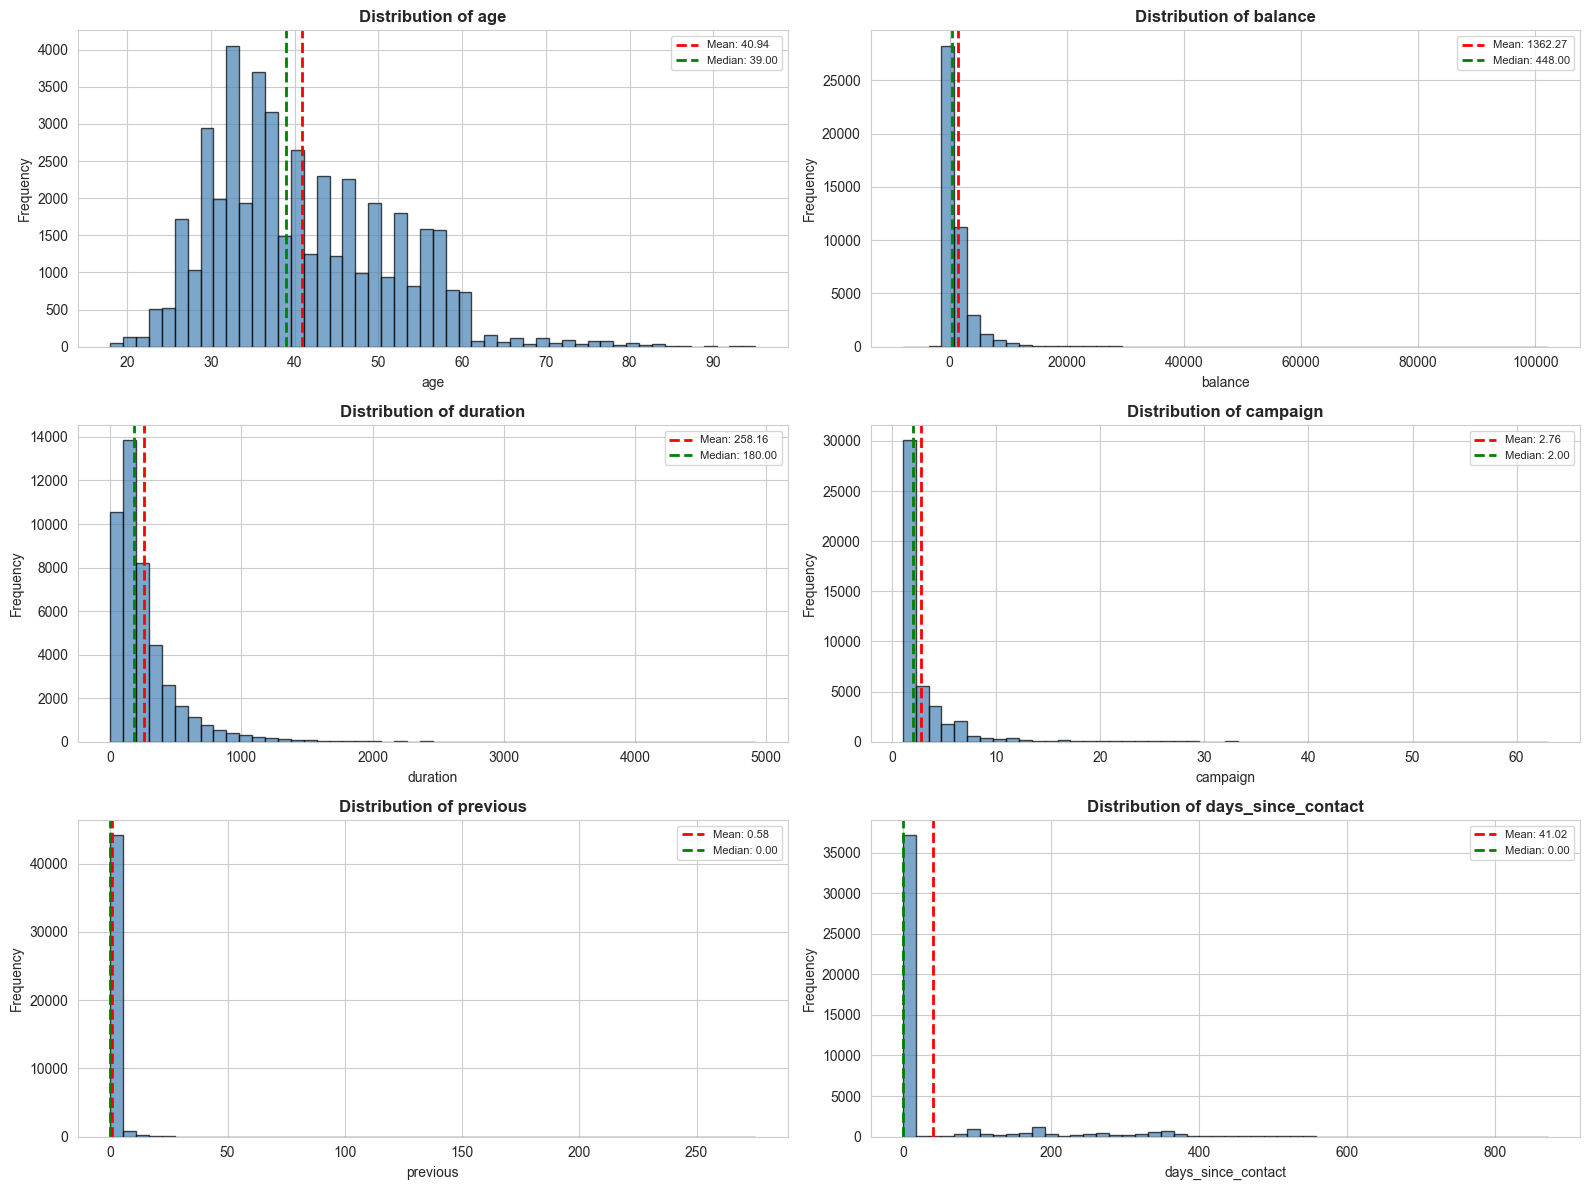

In [52]:
# Distribution of numerical features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=12)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        
        # Add mean and median lines
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
        axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
        axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

We can check for outliers looking at IQR. 
This is not necessarily actionable information but useful to check. 

In [55]:
# Check for outliers using IQR method
print("Outlier detection (using IQR):")
print(f"{'='*90}")
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # using 3 instead of usual 1.5 from personal experience
    upper_bound = Q3 + 3 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Percentage': f"{outlier_pct:.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))
print(f"{'='*90}")

Outlier detection (using IQR):
           Feature  Outlier_Count Percentage Lower_Bound Upper_Bound
               age              3      0.01%      -12.00       93.00
           balance           2443      5.40%    -3996.00     5496.00
          duration           1155      2.55%     -545.00      967.00
          campaign           1462      3.23%       -5.00        9.00
          previous           8257     18.26%        0.00        0.00
days_since_contact           8257     18.26%        0.00        0.00


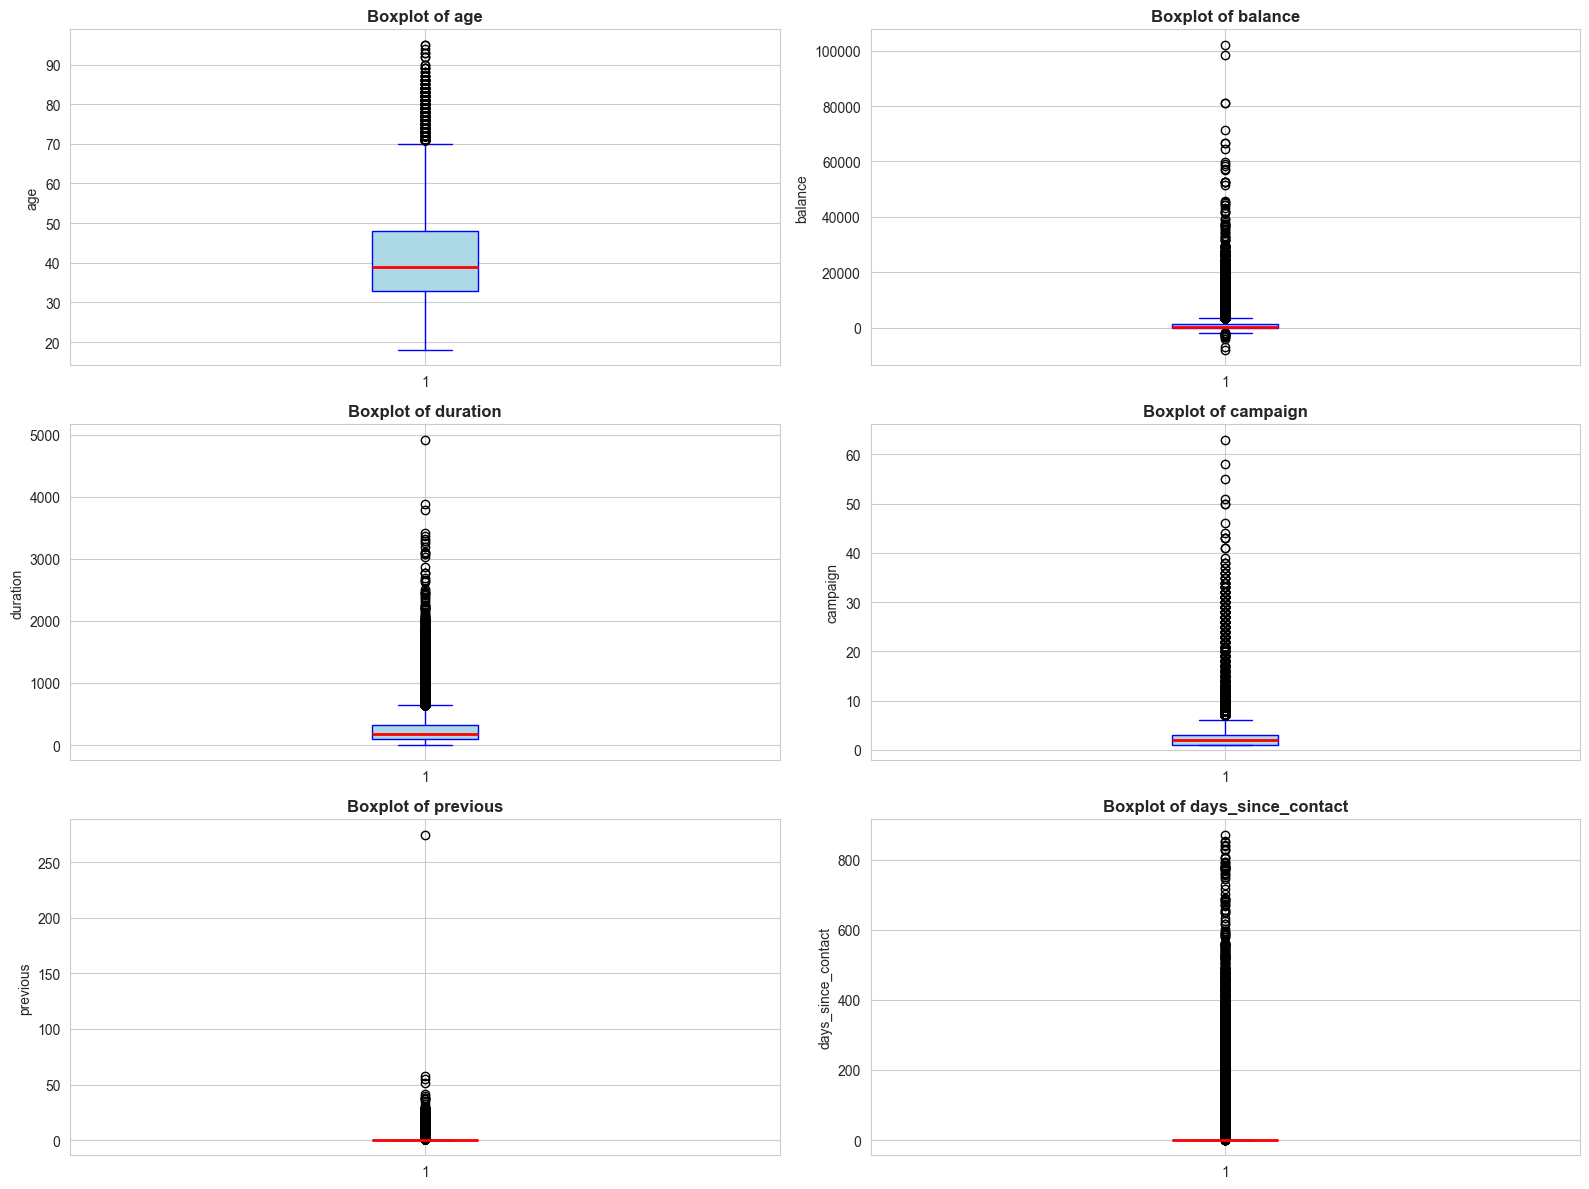

In [54]:
# Boxplots for numerical features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='blue'),
                         capprops=dict(color='blue'))
        axes[idx].set_title(f'Boxplot of {col}', fontweight='bold', fontsize=12)
        axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

There are a **few considerations** based on the above: 
- There are clear outliers for `duration` (last contact duration, in seconds) and for previous (number of contacts performed before this campaign and for this client)
- 'Mechanical' exclusion of outliers based on IQR for `previous` and `days_since_contact` could remove a substantial proportion of the dataset

## 5. Categorical features analysis

In [58]:
# Identify categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

# Cardinality of categorical features
print("Cardinality of categorical features:")
cardinality = {col: df[col].nunique() for col in categorical_cols}
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Feature', 'Unique_Values'])
cardinality_df = cardinality_df.sort_values('Unique_Values', ascending=False)
print(cardinality_df.to_string(index=False))

Categorical features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'was_contacted_before']
Cardinality of categorical features:
             Feature  Unique_Values
                 job             12
               month             12
           education              4
            poutcome              4
             marital              3
             contact              3
             default              2
             housing              2
                loan              2
was_contacted_before              2


It is debatable whether we want to include month in the dataset as the month itself is unlikely to define the success of the outcome. This is something that can be further tested. 

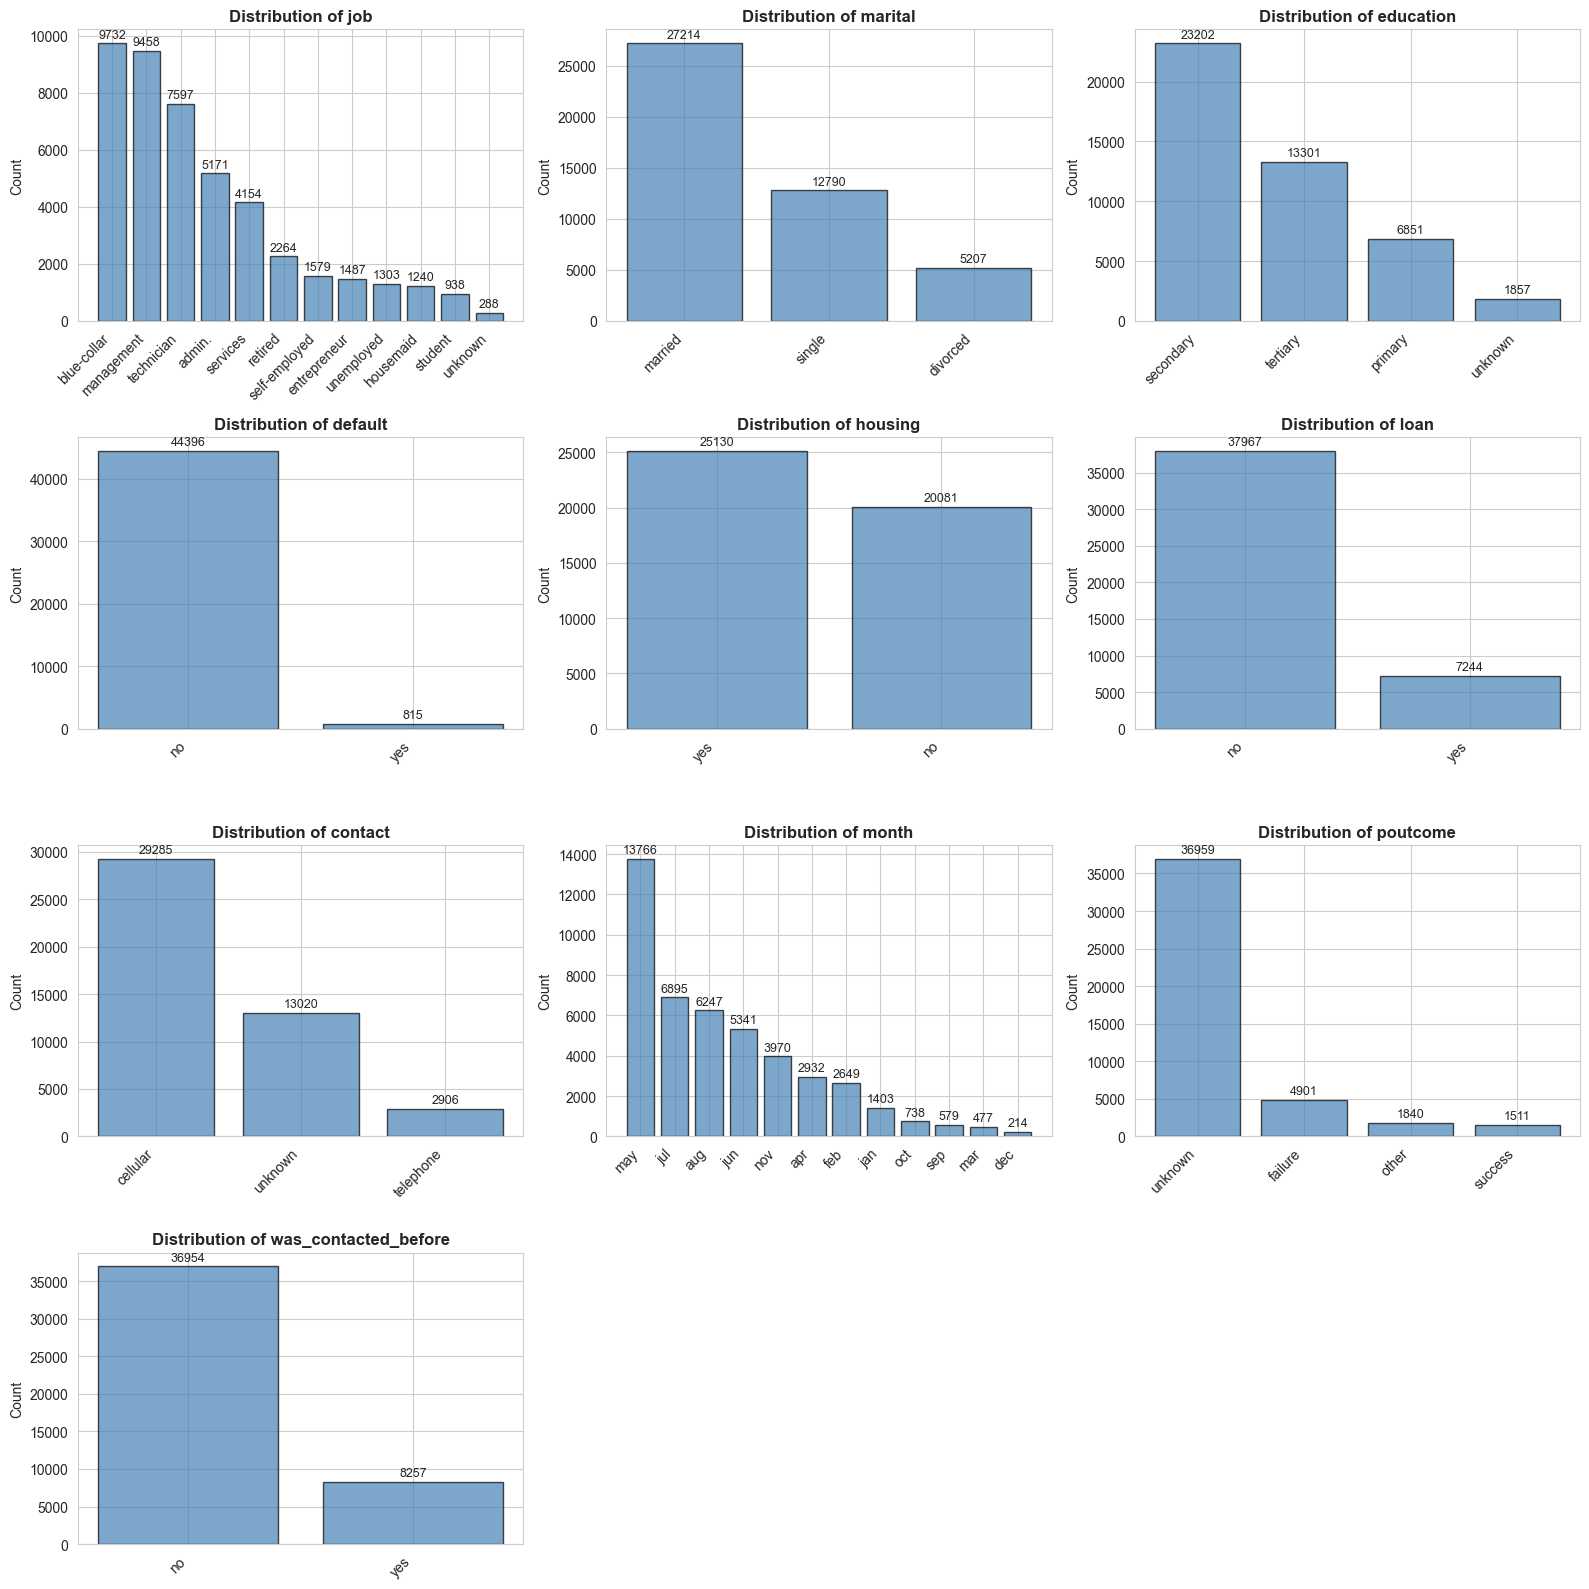

In [59]:
# Distribution of categorical features
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.ravel() if n_rows > 1 else [axes] if n_rows == 1 else axes

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=12)
        axes[idx].set_ylabel('Count')
        
        # Add value labels
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + max(value_counts.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

It is also concerning that there is a lot of unknown values in the outcome of the previous marketing campaign variable. Is this a data error? Could this be improved? Can the unknown values possibly include failure / success / other? 
Considering that, I would strongly **suggest to remove this feature from the dataset** for further investigation. 

We can keep if for now to continue with building up the solution. 

## 6. Remove the outliers

We should remove the outliers per above conclusions before looking at the relationship between features and target variable. 

In [64]:
# Store original size
original_size = len(df)

# 1. Remove outliers using 3*IQR for specified columns
iqr_cols = ['age', 'balance', 'duration', 'campaign']

for col in iqr_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# 2. Remove outliers for 'previous' (exclude > 50)
df = df[df['previous'] <= 50]

# 3. Remove outliers for 'days_since_contact' (exclude > 800)
df = df[df['days_since_contact'] <= 800]

# Report results
removed = original_size - len(df)
print(f"Original size: {original_size:,}")
print(f"Final size: {len(df):,}")
print(f"Removed: {removed:,} rows ({removed/original_size*100:.2f}%)")

Original size: 45,211
Final size: 40,288
Removed: 4,923 rows (10.89%)


## 7. Relationship between features and target variable (y)

We can do some quick exploration of relationships: 

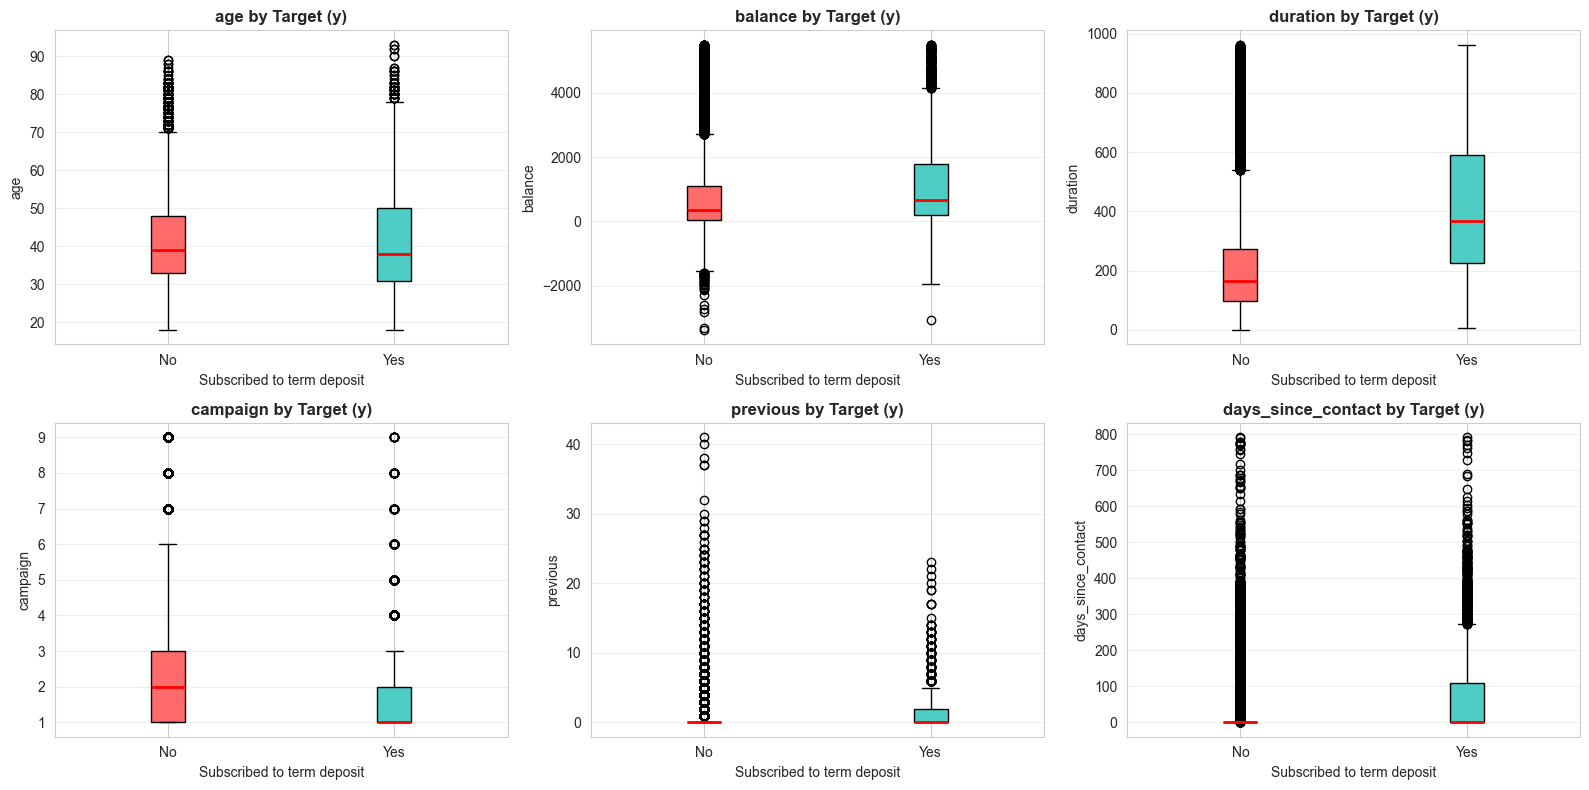

In [66]:
# Numerical features vs target - boxplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        # Separate data by target class
        data_no = df[df['y'] == 'no'][col]
        data_yes = df[df['y'] == 'yes'][col]
        
        bp = axes[idx].boxplot([data_no, data_yes], labels=['No', 'Yes'], patch_artist=True,
                               boxprops=dict(facecolor='lightblue'),
                               medianprops=dict(color='red', linewidth=2))
        
        # Color boxes differently
        bp['boxes'][0].set_facecolor('#ff6b6b')
        bp['boxes'][1].set_facecolor('#4ecdc4')
        
        axes[idx].set_title(f'{col} by Target (y)', fontweight='bold', fontsize=12)
        axes[idx].set_xlabel('Subscribed to term deposit')
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [67]:
# Statistical comparison of numerical features by target class
print("Mean values by target class:")
print("="*90)
comparison_df = df.groupby('y')[numerical_cols].mean().T
comparison_df['Difference'] = comparison_df['yes'] - comparison_df['no']
comparison_df['% Change'] = (comparison_df['Difference'] / comparison_df['no']) * 100
print(comparison_df.round(2))

Mean values by target class:
y                       no      yes  Difference  % Change
age                  40.68    41.54        0.86      2.11
balance             798.63  1161.33      362.70     45.42
duration            210.74   420.17      209.43     99.38
campaign              2.38     1.94       -0.45    -18.77
previous              0.50     1.26        0.76    150.33
days_since_contact   38.40    74.56       36.16     94.17


## 7. Correlation Analysis

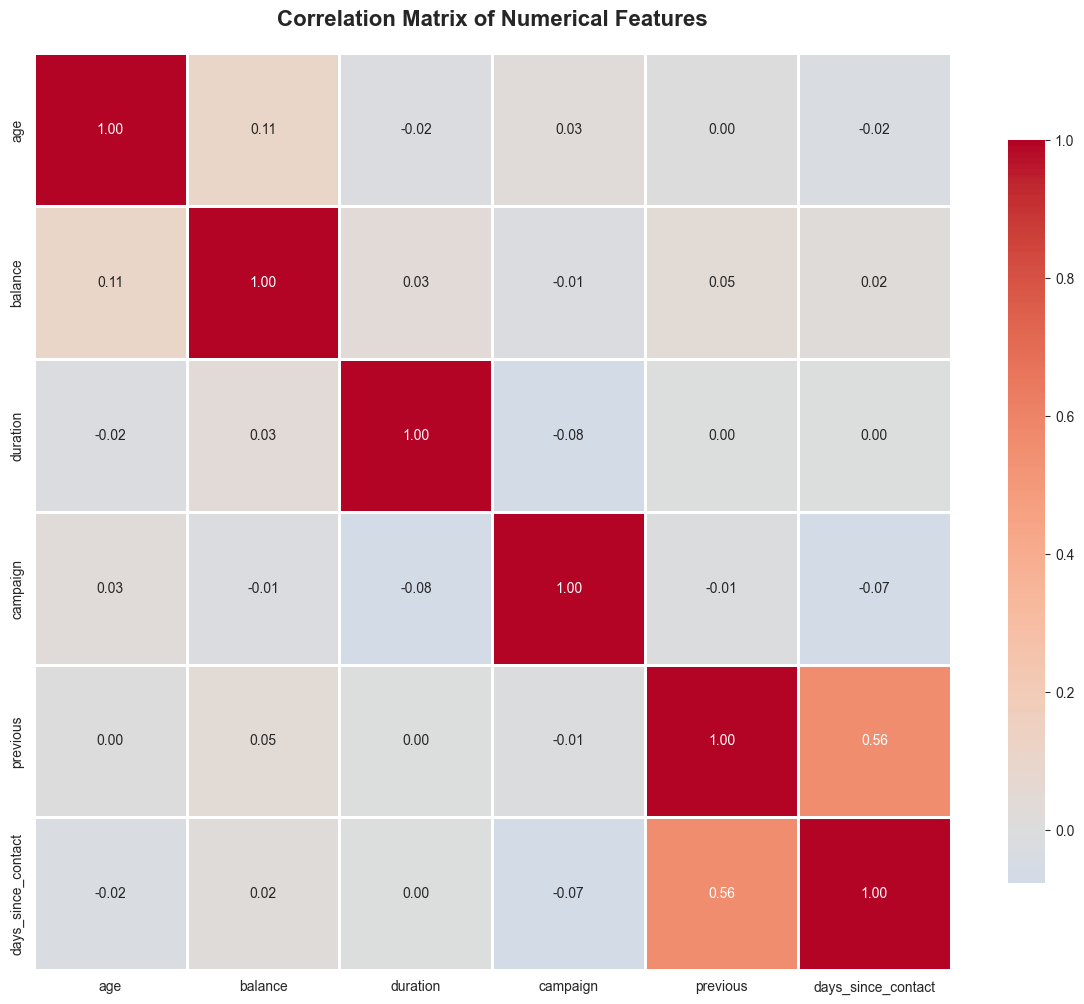


Highly Correlated Feature Pairs (|correlation| > 0.5):
Feature_1          Feature_2 Correlation
 previous days_since_contact       0.557


In [68]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.5):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': f"{correlation_matrix.iloc[i, j]:.3f}"
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated pairs found.")

There is expected correlation between the features of previous and days_since_contact, we can note this but move on for now. 

## 10. Data Wrangling Recommendations

Based on the EDA, here are the recommended data preprocessing steps for XGBoost modeling:

## Summary of steps required for data preprocessing

Based on the exploratory data analysis, the following preprocessing steps should be implemented:

**Feature engineering:** 
- Remove the `day` feature as it doesn't provide meaningful information in its current numeric form
- Split `pdays` into two separate features:
  - `was_contacted_before`: Binary indicator ('yes'/'no') of whether the client was previously contacted
  - `days_since_contact`: Numeric feature representing days since last contact (0 for never contacted)

**Outlier removal:**
- Apply 3×IQR rule for: `age`, `balance`, `duration`, `campaign`
- Remove rows with `previous` > 50  
- Remove rows with `days_since_contact` > 800  

**Handling unknown values:**
- Keep 'unknown' values as a separate category for: `poutcome` (81.75%), `contact` (28.80%), `education` (4.11%), and `job` (0.64%)
- These unknowns may represent genuine missing information patterns that could be predictive

**Class imbalance:**
- Possibly implement rebalancing techniques (e.g., SMOTE, class weights, or undersampling) to address the 88.3% vs 11.7% class distribution
- Consider using XGBoost's built-in `scale_pos_weight` parameter if using XGBoost

**Categorical encoding:**
- Apply label encoding or one-hot encoding to categorical variables: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `was_contacted_before`

**Numerical values handling:**
- If we consider tree based methods, there is generally no need to perform scaling or normalisation. 

**Target variable:**
- Convert `y` from 'yes'/'no' to binary 1/0 format

**Train-test split:**
- Split data into training and test sets with stratification to maintain class distribution
- Recommended split: 80-20  

**Note on feature correlation:**
- Moderate correlation exists between `previous` and `days_since_contact` (0.557), but this is expected and doesn't require removal for tree-based models

## Model recommendation

**XGBoost (Extreme Gradient Boosting) looks as a model to use for this dataset** due to several characteristics that make it particularly well-suited for this binary classification problem:

### Why XGBoost:
- Our dataset contains both numerical features which is handled well with tree-based structure (age, balance, duration, campaign, previous, days_since_contact) and categorical features (job, marital, education, contact, month, etc.)  
- Tree-based models like XGBoost are inherently robust to outliers because they make splits based on feature thresholds rather than distance metrics. Despite outlier removal, the dataset still contains features with high variance.  
- The dataset has significant class imbalance (88.3% 'no' vs 11.7% 'yes'). XGBoost provides built-in parameters like `scale_pos_weight` to address imbalanced classes directly.
- Captures non-linear relationships well. 
- XGBoost provides interpretable feature importance scores. This is valuable for understanding which factors most influence term deposit subscriptions.  
- Our dataset has substantial 'unknown' values in categorical features (up to 81.75% in poutcome). XGBoost has a built-in mechanism to handle missing values by learning the best direction to take when a value is missing, which is superior to simple imputation strategies. 

### Recommended XGBoost Configuration:
- Use `scale_pos_weight` parameter set to approximately 7.5 (ratio of negative to positive class)
- Enable early stopping to prevent overfitting
- Use cross-validation to tune hyperparameters (max_depth, learning_rate, n_estimators, min_child_weight) 
- Use appropriate evaluation metrics: AUC-ROC, Precision-Recall curves, F1-score (not just accuracy due to imbalance)